<a href="https://colab.research.google.com/github/ssrivastav01/Barcode-Generator/blob/main/Mybarcodegenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install python-barcode pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 5.1 MB/s eta 0:00:00


In [4]:
from barcode import Code128
from barcode.writer import ImageWriter
import os

def generate_barcode(category_prefix, subcategory_suffix, color_code, size_code, unique_number):
    """
    Generate an 11-digit barcode number and return it as a string.

    :param category_prefix: Single digit representing category prefix (1-5).
    :param subcategory_suffix: Single digit representing subcategory suffix (1-8 for Spirit Wear, others vary).
    :param color_code: Single digit representing primary color (1-5).
    :param size_code: Single digit representing size (1-7).
    :param unique_number: Two digits to ensure uniqueness (00-99).
    :return: 11-digit barcode as a string.
    """
    # Fixed common number in the middle
    common_number = "1890"

    # Format barcode with all parts and ensure unique number is two digits
    barcode_number = f"{category_prefix}{subcategory_suffix}{common_number}{color_code}{size_code}{unique_number:02}"
    return barcode_number

def save_barcode_image(barcode_number, output_folder="barcodes"):
    """
    Save the barcode as a PNG image.

    :param barcode_number: The barcode number as a string.
    :param output_folder: Folder to save the barcode images.
    """
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Generate and save barcode image
    barcode_obj = Code128(barcode_number, writer=ImageWriter())
    filename = os.path.join(output_folder, barcode_number)
    barcode_obj.save(filename)
    print(f"Saved barcode image: {filename}.png")

# Initialize last unique number
last_unique_number = 0

# Main loop for generating barcodes
while True:
    # Input for category and options
    category_prefix = input("Enter Category Prefix (1-5): ")

    # Initialize subcategory_suffix, color_code, size_code
    subcategory_suffix = ""
    color_code = ""
    size_code = ""

    # Set values based on category
    if category_prefix == "1":  # Spirit Wear
        subcategory_suffix = input("Enter Subcategory Suffix (1-8): ")
        color_code = input("Enter Primary Color Code (1-5): ")
        size_code = input("Enter Size Code (1-7): ")
    elif category_prefix == "2":  # Drinkware
        subcategory_suffix = input("Enter Subcategory Suffix (1-2): ")
        color_code = input("Enter Primary Color Code (1-5): ")
        size_code = "0"  # No size for Drinkware
    elif category_prefix == "3":  # Accessories
        subcategory_suffix = input("Enter Subcategory Suffix (1-5): ")
        color_code = input("Enter Primary Color Code (1-5): ")
        size_code = "0"  # No size for Accessories
    elif category_prefix == "4":  # Books
        subcategory_suffix = "1"  # Default for Books
        color_code = "0"  # Default
        size_code = "0"  # Default
    elif category_prefix == "5":  # Art Supplies
        subcategory_suffix = "1"  # Default for Art Supplies
        color_code = "0"  # Default
        size_code = "0"  # Default
    else:
        print("Invalid category choice.")
        continue

    # Ask how many barcodes to generate in sequence
    try:
        num_barcodes = int(input("How many barcodes do you want in sequence? "))
    except ValueError:
        print("Invalid input. Please enter a number.")
        continue

    # Generate the specified number of barcodes with incremental unique numbers
    for i in range(num_barcodes):
        barcode_number = generate_barcode(category_prefix, subcategory_suffix, color_code, size_code, last_unique_number + i)
        print("Generated Barcode:", barcode_number)
        save_barcode_image(barcode_number)

    # Update last unique number
    last_unique_number += num_barcodes

    # Ask if the user wants to generate another set
    cont = input("Generate another set of barcodes? (y/n): ")
    if cont.lower() != 'y':
        break


Enter Category Prefix (1-5): 1
Enter Subcategory Suffix (1-8): 1
Enter Primary Color Code (1-5): 1
Enter Size Code (1-7): 1
How many barcodes do you want in sequence? 9
Generated Barcode: 1118901100
Saved barcode image: barcodes/1118901100.png
Generated Barcode: 1118901101
Saved barcode image: barcodes/1118901101.png
Generated Barcode: 1118901102
Saved barcode image: barcodes/1118901102.png
Generated Barcode: 1118901103
Saved barcode image: barcodes/1118901103.png
Generated Barcode: 1118901104
Saved barcode image: barcodes/1118901104.png
Generated Barcode: 1118901105
Saved barcode image: barcodes/1118901105.png
Generated Barcode: 1118901106
Saved barcode image: barcodes/1118901106.png
Generated Barcode: 1118901107
Saved barcode image: barcodes/1118901107.png
Generated Barcode: 1118901108
Saved barcode image: barcodes/1118901108.png
Generate another set of barcodes? (y/n): y
Enter Category Prefix (1-5): 1
Enter Subcategory Suffix (1-8): 1
Enter Primary Color Code (1-5): 1
Enter Size Cod

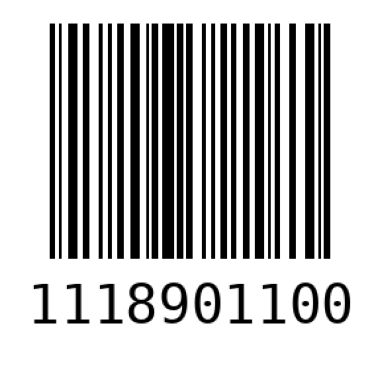

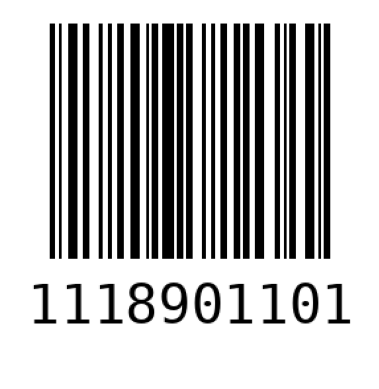

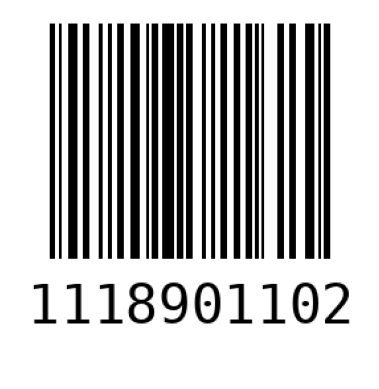

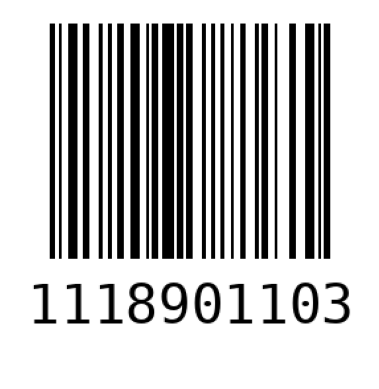

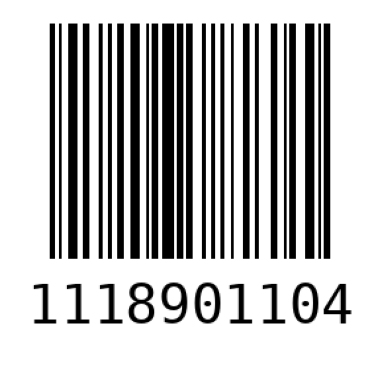

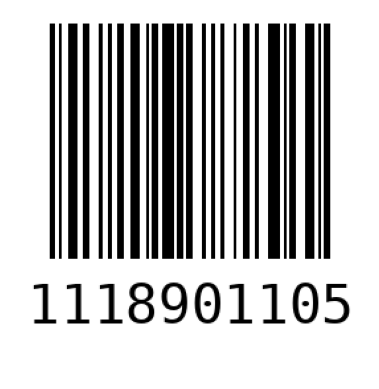

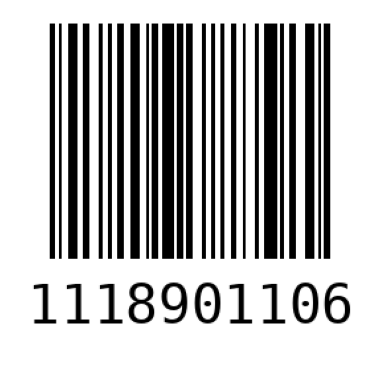

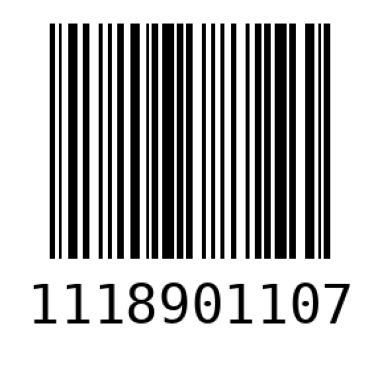

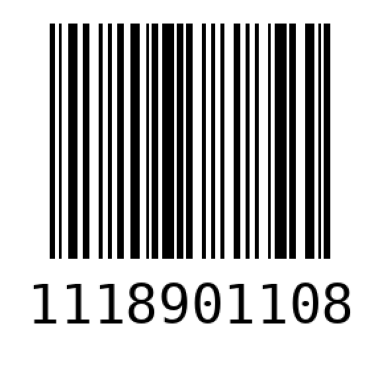

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Display all the generated barcodes
for i in range(num_barcodes):
    barcode_filename = f'barcodes/{generate_barcode(category_prefix, subcategory_suffix, color_code, size_code, unique_number + i)}.png'
    img = Image.open(barcode_filename)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

In [7]:
import shutil

# Create a ZIP file of the barcodes directory
shutil.make_archive('barcodes', 'zip', 'barcodes')
from google.colab import files

# Download the ZIP file
files.download('barcodes.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>